# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Riccardo Beccaria - Luglio 2021</span>

# <span style="color:green"> Esercitazione 12<span>
 

### Esercizio 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. Watch to accuracy and loss for training and validation data and comment on the performances.

In questo esercizio si fa utilizzo del database di cifre scritte a mano MNIST per allenare due tipi diversi di rete neurale:
1. Una deep neural network DNN di tipo farward non troppo diversa da quelle che ho presentato fino a questo punto.
2. Una  <span style="color:red">convolutionary neural network CNN</span> introdotte in questa esercitazione.


Nell'esercizio 12.1 si allena la deep neural network. Questa rete è costituita da due hidden layers di tipo denso *Dense* (tutti i neuroni tra loro connessi) rispettivamente di dimensioni $[400, 100]$ e un layer di *Dropout*. Il layer di Dropout è un layer che spegne alcuni neuroni con una certa probabilità durante la fase di training. Questa probabilità deve essere fornita in input definendo il layer. Nel mio caso la probabilità di spegnimento di alcuni neuroni è del 50%. Questo meccanismo si ha esclusivamente durante la fase di training.

Il motivo per cui si utilizza il layer di *Dropout* è per cercare di evitare il fenomeno di overfitting. L'overfitting è un fenomeno per il quale il modello impara a predirre anche il rumore dei miei dati. Inibendo randomicamente alcuni neuroni con una certa probabilità, questo fenomeno ha meno probabilità di capitare.
La presenza di questo layer di *Dropout* provoca che la *loss function* valutata sull'insieme di training possa rimanere con un valore alto, e addirittura risalire in alcuni punti. Chiaramente una volta allenata questa rete neurale, il layer di Dropout non ha più ragion d'essere e quindi viene spento dal modello. In questo modo si può così osservare questo particolare fenomeno in cui la funzione costo valutata sul train set risulta essere addirittura maggiore della funzione costo valutata sul validation set.

Ho deciso di trainare la deep neural network DNN con gli ottimizzatori: *SGD*, *Adam*, *RMSprop* e infine *Adadelta*. Ho qui sotto riportato i grafici e i commenti a questi training eseguiti con questi differenti ottimizzatori.


<span style="color:red">N.B.</span> anche in questo caso per comodità ed eleganza del report ho definito una funzione che prende in ingresso una stringa (che è il nome dell'ottimizzatore) e definisce ed allena la rete neurale con quel dato ottimizzatore.

Inoltre, ogni ottimizzatore è stato testato facendo vedere la predizione della rete allenata associata, di dieci cifre estratte dal database MNIST.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
an example of a data point with label 4


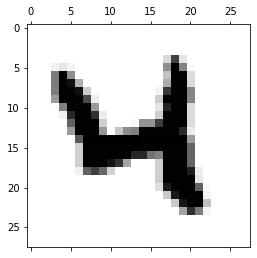

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.


In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout

img_rows, img_cols = 28, 28 #immage dimension 28x28
num_classes = 10 #10 digits
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()# the data, split between train and test sets

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)# reshape data, it could depend on Keras backend
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

X_train = X_train.astype('float32')# cast floats to single precision
X_test = X_test.astype('float32')

X_train /= 255# rescale data in interval [0,1]
X_test /= 255
# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
batch_size = 32
epochs = 15

def compile_model(optimizer_name):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  #optimizer=SGD(),
                  optimizer=optimizer_name,
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

In [2]:
#fig, axs= plt.subplots(4,2, figsize=(14,24))
#optimizers=['sgd', 'Adam', 'rmsprop', 'adagrad']
#i=0

def NN_train(optimizer):
    fig, axs= plt.subplots(1,2, figsize=(14,6))
    print()
    print("=================================================================")
    print("==                                                             ==")
    print("==                   RUNNING "+ str(optimizer)+ "                         ==")
    print("==                                                             ==")
    print("=================================================================")
    
    # create the deep neural net
    model_DNN = compile_model(optimizer)

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))

    # evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose=0)

    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # look into training history

    # summarize history for accuracy
    axs[0].plot(history.history['acc'])
    axs[0].plot(history.history['val_acc'])
    axs[0].set_ylabel('model accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'test'], loc='best')

    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_ylabel('model loss')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'test'], loc='best')
    print()
    
    X_test_check=X_test
    Y_test_check=Y_test

    predictions = model_DNN.predict(X_test_check)

    X_test_check = X_test_check.reshape(X_test_check.shape[0], img_rows, img_cols,1)

    plt.figure(figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test_check[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test_check[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()


==                                                             ==
==                   RUNNING sgd                         ==
==                                                             ==


2021-07-06 17:29:32.711535: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-07-06 17:29:32.767692: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)



Test loss: 0.08621037006378174
Test accuracy: 0.9722999930381775



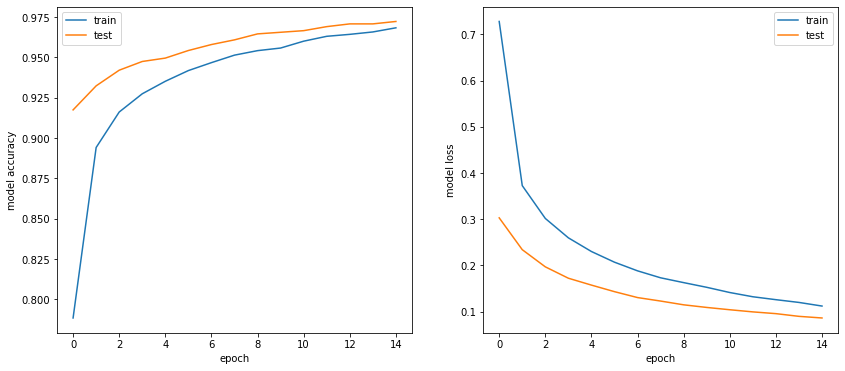

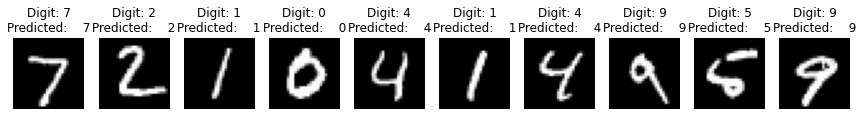

In [3]:
NN_train('sgd')


==                                                             ==
==                   RUNNING Adam                         ==
==                                                             ==

Test loss: 0.10477380454540253
Test accuracy: 0.9817000031471252



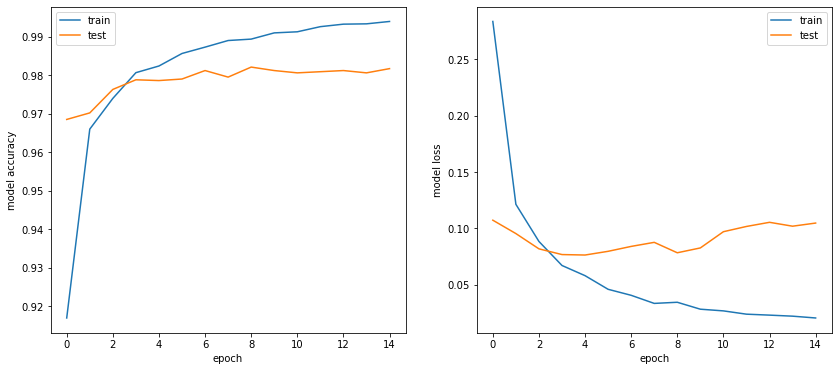

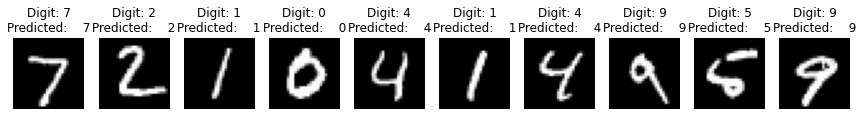

In [4]:
NN_train('Adam')


==                                                             ==
==                   RUNNING RMSprop                         ==
==                                                             ==

Test loss: 0.2669466733932495
Test accuracy: 0.973800003528595



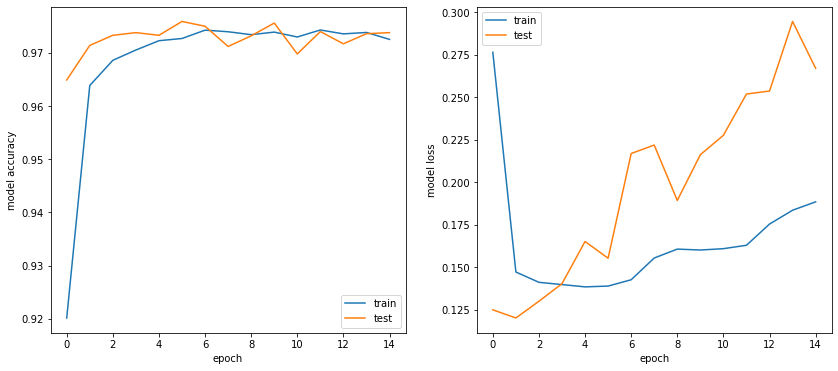

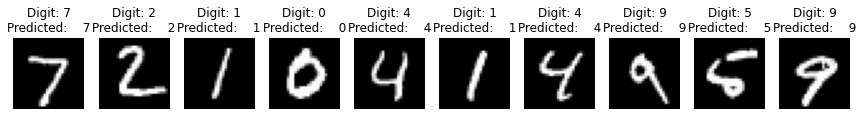

In [5]:
NN_train('RMSprop')


==                                                             ==
==                   RUNNING Adadelta                         ==
==                                                             ==

Test loss: 0.6994184851646423
Test accuracy: 0.8511000275611877



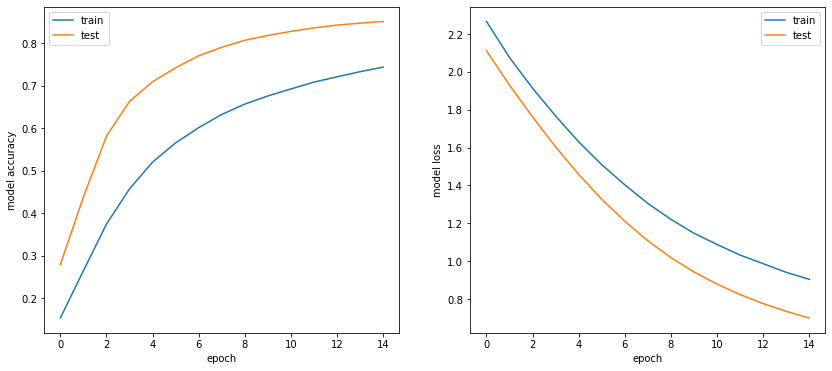

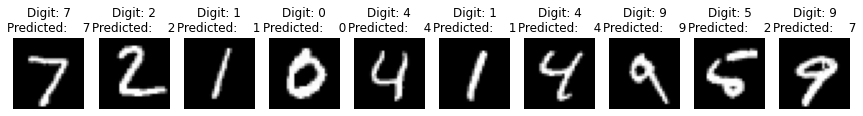

In [6]:
NN_train('Adadelta')

Per quanto tutti e quattro gli ottimizzatori provati garantiscono un alto livello di performance, i due ottimizzatori migliori sono i due ottimizzatori stocastici *SGD* e *Adam*

Ho ridefinito il modello della rete neurale allenata con l'ottimizzatore *SGD* per poterlo utilizzare nel resto dell'esercitazione.

In [14]:
model_DNN = compile_model('sgd')

    # train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(X_test, Y_test))

### Esercizio 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that you should complete the model.
Train your DCNN and evaluate its performance proceeding exactly as before:

L'esercizio richiede di completare la struttura di un modello fornito per farla diventare una <font color="red">rete neurale convoluzionaria CNN</font>. Una rete neurale convoluzionaria comporta la presenza di:
- *Layer Convoluzionali*: questi sono layer composti da multipli sottolayer che operano una convoluzione (con determinati filtri). Questo significa che i valori nei neuroni del layer successivo dipendono dal valore di una determinata cella in tutti i suoi sottolayer.
- *Layer di Pooling*: questi layer estraggono da un set di dati il maggiore e lo riportano nel layer successivo.
- L'ultimo layer convoluzionale viene poi srotolato con la funzione *Flatten()* e infine viene aggiunto un layer di output con 10 neuroni, tanti quanti i possibili esiti della predizione. L'ultimo layer ha come funzione di attivazione una *softmax* perché essa rappresenta la probabilità di ottenere una determinata cifra.
- Ho inoltre aggiunto una serie di *Dense layer* tra le maxpool e le convoluzioni per migliorare la predizione della rete.

Una volta costruita la rete il processo di training e di predizione è identico a quello di una Deep Neural Network.

In [7]:
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10 #10 digits


X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [8]:
def create_CNN():
    
    model = Sequential()
    
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
    model.add(Conv2D(16, kernel_size=(5,5),activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None))
    model.add(Flatten())
    model.add(Dense(256,activation='tanh'))
    model.add(Dense(120,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
 
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    model.summary()
    return model

In [9]:
# training parameters
batch_size = 32
epochs = 15

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          4016      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 120)              

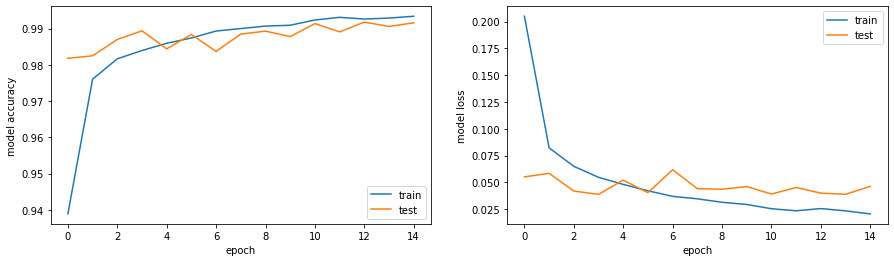

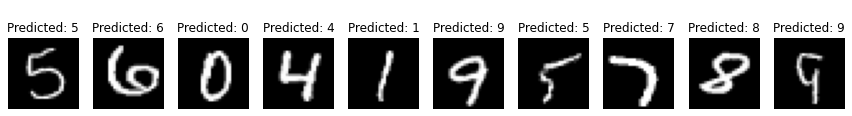

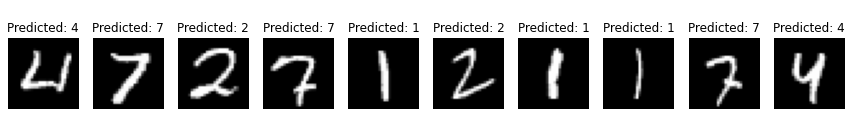

In [10]:
fig, axs = plt.subplots(1,2, figsize=(15,4))

axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_ylabel('model accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='best')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_ylabel('model loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='best')
plt.show()

predictions = model_CNN.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i+53, :, :, 0], cmap='gray')    
    plt.title("\nPredicted: {}".format(np.argmax(Y_test[i+53]), np.argmax(predictions[i+53])))    
    plt.axis('off') 
plt.show()
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i+33, :, :, 0], cmap='gray')    
    plt.title("\nPredicted: {}".format(np.argmax(Y_test[i+33]), np.argmax(predictions[i+33])))    
    plt.axis('off') 
plt.show()

Come è possibile osservare dai grafici in cui ho riportato la funzione loss valutata sul train set e l'andamento dell'accuratezza in funzione delle 15 epoche con cui ho allenato la rete, si può osservare la grande capacità predittiva di questa mia rete convoluzionaria. In particolare ho ottenuto:
- Una *Test loss*=0.0462
- Un'accuratezza del 99.15%

Inoltre, come riportato sotto gli ultimi due grafici, estratte 20 cifre in maniera randomica dal database MNIST è possibile vedere come la rete riesce a predirre correttamente tutte e 20 le cifre selezionate.

### Esercizio 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

Ho semplicemente utilizzato la rete neurale *farward* e la rete neurale *convoluzionale* definite ed allenate nei punti per predirre le cifre sritte da me grazie alla applicazione `gimp`. Ho riportato in fondo al report i risultati ottenuti.

In [25]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

digit_test = np.zeros((10,28, 28))
digit_target = np.zeros((10,10))

for k in range (10):
    
    digit_filename = "./Pictures/{}b.png".format(k)
    digit_in = Image.open(digit_filename).convert('L')
    digit_target[k,k] = 1
    ydim, xdim = digit_in.size
#    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    digit_test[k] = data
    
print("Test data shape = ", digit_test.shape)

Test data shape =  (10, 28, 28)


CNN
1/1 [==============================] - 0s 14ms/step - loss: 0.0271 - accuracy: 1.0000
Performance on validation data
Test loss: 0.027121592313051224
Test accuracy: 1.0



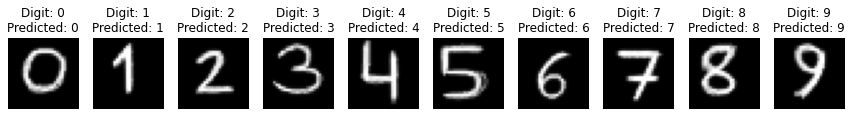

In [26]:
#Predict with CNN
if keras.backend.image_data_format() == 'channels_first':
    digit_test = digit_test.reshape(digit_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    digit_test = digit_test.reshape(digit_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

predictions = model_CNN.predict(digit_test)
# evaluate model
print("CNN")

score = model_CNN.evaluate(digit_test, digit_target, verbose=1)


print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)       
    plt.imshow(digit_test[i, :, :, 0], cmap='gray')   
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(digit_target[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

DNN
1/1 [==============================] - 0s 13ms/step - loss: 1.7332 - acc: 0.6000
Performance on validation data
Test loss: 1.7331874370574951
Test accuracy: 0.6000000238418579



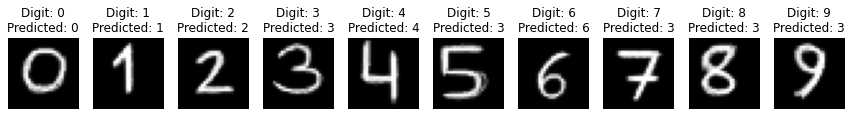

In [27]:
print("DNN")

digit_test = digit_test.reshape(digit_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(digit_test)

# evaluate model
score = model_DNN.evaluate(digit_test, digit_target, verbose=1)

print("Performance on validation data")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

if keras.backend.image_data_format() == 'channels_first':
    digit_test = digit_test.reshape(digit_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    digit_test = digit_test.reshape(digit_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)       
    plt.imshow(digit_test[i, :, :, 0], cmap='gray')   
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(digit_target[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

I risultati ottenuti sono:

1. La rete neurale convoluzionale è in grado di predirretutte e 10 le cifre scritte a mano da me: score 10/10.
2. Invece la farward neural network riesce a predirre solo 6 delle 10 cifre da me scritte. score 6/10.

Questa è un'ulteriore conferma che per questo tipo di problema è più conveniente ed è più efficiente il training di una rete neurale convoluzionale.